# CS405 Quantum Computation Project

# Group 10
# Project topic : Quantum Optimization Algorithms
## Quantum Approximate Optimization Algorithm (QAOA)

## 202003020 - Prathav Kevadiya
## 202003025 - Preet Mevawalla
## 202003048 - Prayag Patel

## [Google Colab Link](https://colab.research.google.com/drive/1hq6xiTdUHgVCootwLD146A2tiHtlrvlJ?usp=sharing)

In [18]:
!pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Qiskit**

In [19]:
import networkx as nx
import matplotlib.pyplot as plt

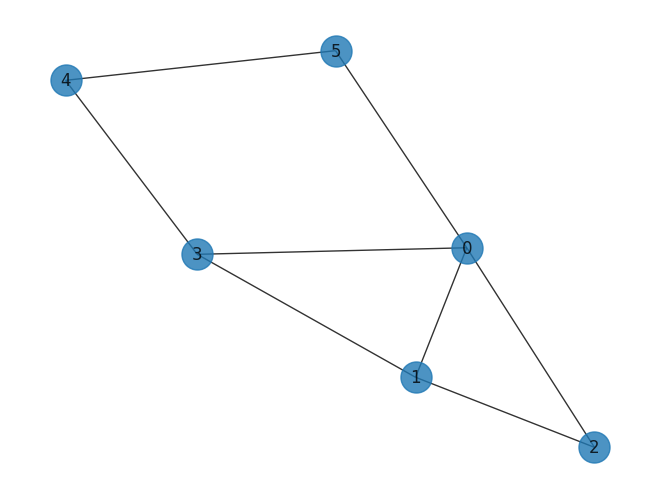

In [20]:
import networkx as nx

G = nx.Graph()
# graph type 1
# G.add_nodes_from([0, 1, 2, 3, 4, 5])
# G.add_edges_from([(0, 1), (1, 2), (0, 3), (3, 4),(4,5),(5,0),(2,0)])
# graph type 2
G.add_nodes_from([0, 1, 2, 3, 4, 5])
G.add_edges_from([(0, 1), (1, 2), (0, 3), (3, 4),(4,5),(5,0),(2,0),(1,3)])

nx.draw(G, with_labels=True, alpha=0.8, node_size=500)

In [21]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import Aer, execute
from qiskit.circuit import Parameter

# Adjacency is essentially a matrix which tells you which nodes are
# connected. This matrix is given as a sparse matrix, so we need to
# convert it to a dense matrix
adjacency = nx.adjacency_matrix(G).todense()

nqubits = 6

beta = Parameter("$\\beta$")
qc_mix = QuantumCircuit(nqubits)
for i in range(0, nqubits):
    qc_mix.rx(2 * beta, i)
    
qc_mix.draw()

┌───────────────┐
q_0: ┤ Rx(2*$\beta$) ├
     ├───────────────┤
q_1: ┤ Rx(2*$\beta$) ├
     ├───────────────┤
q_2: ┤ Rx(2*$\beta$) ├
     ├───────────────┤
q_3: ┤ Rx(2*$\beta$) ├
     ├───────────────┤
q_4: ┤ Rx(2*$\beta$) ├
     ├───────────────┤
q_5: ┤ Rx(2*$\beta$) ├
     └───────────────┘

In [22]:
gamma = Parameter("$\\gamma$")
qc_p = QuantumCircuit(nqubits)
for pair in list(G.edges()):  # pairs of nodes
    qc_p.rzz(2 * gamma, pair[0], pair[1])
    qc_p.barrier()
    
qc_p.decompose().draw()

░                              ░      »
q_0: ──■──────────────────────■───░───■──────────────────────■───░───■──»
     ┌─┴─┐┌────────────────┐┌─┴─┐ ░   │                      │   ░   │  »
q_1: ┤ X ├┤ Rz(2*$\gamma$) ├┤ X ├─░───┼──────────────────────┼───░───┼──»
     └───┘└────────────────┘└───┘ ░   │                      │   ░   │  »
q_2: ─────────────────────────────░───┼──────────────────────┼───░───┼──»
                                  ░ ┌─┴─┐┌────────────────┐┌─┴─┐ ░   │  »
q_3: ─────────────────────────────░─┤ X ├┤ Rz(2*$\gamma$) ├┤ X ├─░───┼──»
                                  ░ └───┘└────────────────┘└───┘ ░   │  »
q_4: ─────────────────────────────░──────────────────────────────░───┼──»
                                  ░                              ░ ┌─┴─┐»
q_5: ─────────────────────────────░──────────────────────────────░─┤ X ├»
                                  ░                              ░ └───┘»
«                             ░                              ░      »
«q_0: ────────────────────■───░───■──────────────────────■───░──────»
«                         │   ░   │                      │   ░      »
«q_1: ────────────────────┼───░───┼──────────────────────┼───░───■──»
«                         │   ░ ┌─┴─┐┌────────────────┐┌─┴─┐ ░ ┌─┴─┐»
«q_2: ────────────────────┼───░─┤ X ├┤ Rz(2*$\gamma$) ├┤ X ├─░─┤ X ├»
«                         │   ░ └───┘└────────────────┘└───┘ ░ └───┘»
«q_3: ────────────────────┼───░──────────────────────────────░──────»
«                         │   ░                              ░      »
«q_4: ────────────────────┼───░──────────────────────────────░──────»
«     ┌────────────────┐┌─┴─┐ ░                              ░      »
«q_5: ┤ Rz(2*$\gamma$) ├┤ X ├─░──────────────────────────────░──────»
«     └────────────────┘└───┘ ░                              ░      »
«                             ░                              ░      »
«q_0: ────────────────────────░──────────────────────────────░──────»
«                             ░                              ░      »
«q_1: ────────────────────■───░───■──────────────────────■───░──────»
«     ┌────────────────┐┌─┴─┐ ░   │                      │   ░      »
«q_2: ┤ Rz(2*$\gamma$) ├┤ X ├─░───┼──────────────────────┼───░──────»
«     └────────────────┘└───┘ ░ ┌─┴─┐┌────────────────┐┌─┴─┐ ░      »
«q_3: ────────────────────────░─┤ X ├┤ Rz(2*$\gamma$) ├┤ X ├─░───■──»
«                             ░ └───┘└────────────────┘└───┘ ░ ┌─┴─┐»
«q_4: ────────────────────────░──────────────────────────────░─┤ X ├»
«                             ░                              ░ └───┘»
«q_5: ────────────────────────░──────────────────────────────░──────»
«                             ░                              ░      »
«                             ░                              ░ 
«q_0: ────────────────────────░──────────────────────────────░─
«                             ░                              ░ 
«q_1: ────────────────────────░──────────────────────────────░─
«                             ░                              ░ 
«q_2: ────────────────────────░──────────────────────────────░─
«                             ░                              ░ 
«q_3: ────────────────────■───░──────────────────────────────░─
«     ┌────────────────┐┌─┴─┐ ░                              ░ 
«q_4: ┤ Rz(2*$\gamma$) ├┤ X ├─░───■──────────────────────■───░─
«     └────────────────┘└───┘ ░ ┌─┴─┐┌────────────────┐┌─┴─┐ ░ 
«q_5: ────────────────────────░─┤ X ├┤ Rz(2*$\gamma$) ├┤ X ├─░─
«                             ░ └───┘└────────────────┘└───┘ ░

# Initial State

In [23]:
qc_0 = QuantumCircuit(nqubits)
for i in range(0, nqubits):
    qc_0.h(i)
    
qc_0.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     ├───┤
q_3: ┤ H ├
     ├───┤
q_4: ┤ H ├
     ├───┤
q_5: ┤ H ├
     └───┘

# QAOA Circuit

In [24]:
qc_qaoa = QuantumCircuit(nqubits)

qc_qaoa.append(qc_0, [i for i in range(0, nqubits)])
qc_qaoa.append(qc_p, [i for i in range(0, nqubits)])
qc_qaoa.append(qc_mix, [i for i in range(0, nqubits)])

qc_qaoa.decompose().decompose().draw()

┌─────────┐                             ░                              ░ »
q_0: ┤ U2(0,π) ├──■──────────────────────■───░───■──────────────────────■───░─»
     ├─────────┤┌─┴─┐┌────────────────┐┌─┴─┐ ░   │                      │   ░ »
q_1: ┤ U2(0,π) ├┤ X ├┤ Rz(2*$\gamma$) ├┤ X ├─░───┼──────────────────────┼───░─»
     ├─────────┤└───┘└────────────────┘└───┘ ░   │                      │   ░ »
q_2: ┤ U2(0,π) ├─────────────────────────────░───┼──────────────────────┼───░─»
     ├─────────┤                             ░ ┌─┴─┐┌────────────────┐┌─┴─┐ ░ »
q_3: ┤ U2(0,π) ├─────────────────────────────░─┤ X ├┤ Rz(2*$\gamma$) ├┤ X ├─░─»
     ├─────────┤                             ░ └───┘└────────────────┘└───┘ ░ »
q_4: ┤ U2(0,π) ├─────────────────────────────░──────────────────────────────░─»
     ├─────────┤                             ░                              ░ »
q_5: ┤ U2(0,π) ├─────────────────────────────░──────────────────────────────░─»
     └─────────┘                             ░                              ░ »
«                                  ░                              ░      »
«q_0: ──■──────────────────────■───░───■──────────────────────■───░──────»
«       │                      │   ░   │                      │   ░      »
«q_1: ──┼──────────────────────┼───░───┼──────────────────────┼───░───■──»
«       │                      │   ░ ┌─┴─┐┌────────────────┐┌─┴─┐ ░ ┌─┴─┐»
«q_2: ──┼──────────────────────┼───░─┤ X ├┤ Rz(2*$\gamma$) ├┤ X ├─░─┤ X ├»
«       │                      │   ░ └───┘└────────────────┘└───┘ ░ └───┘»
«q_3: ──┼──────────────────────┼───░──────────────────────────────░──────»
«       │                      │   ░                              ░      »
«q_4: ──┼──────────────────────┼───░──────────────────────────────░──────»
«     ┌─┴─┐┌────────────────┐┌─┴─┐ ░                              ░      »
«q_5: ┤ X ├┤ Rz(2*$\gamma$) ├┤ X ├─░──────────────────────────────░──────»
«     └───┘└────────────────┘└───┘ ░                              ░      »
«                             ░                              ░      »
«q_0: ────────────────────────░──────────────────────────────░──────»
«                             ░                              ░      »
«q_1: ────────────────────■───░───■──────────────────────■───░──────»
«     ┌────────────────┐┌─┴─┐ ░   │                      │   ░      »
«q_2: ┤ Rz(2*$\gamma$) ├┤ X ├─░───┼──────────────────────┼───░──────»
«     └────────────────┘└───┘ ░ ┌─┴─┐┌────────────────┐┌─┴─┐ ░      »
«q_3: ────────────────────────░─┤ X ├┤ Rz(2*$\gamma$) ├┤ X ├─░───■──»
«                             ░ └───┘└────────────────┘└───┘ ░ ┌─┴─┐»
«q_4: ────────────────────────░──────────────────────────────░─┤ X ├»
«                             ░                              ░ └───┘»
«q_5: ────────────────────────░──────────────────────────────░──────»
«                             ░                              ░      »
«                             ░                              ░ »
«q_0: ────────────────────────░──────────────────────────────░─»
«                             ░                              ░ »
«q_1: ────────────────────────░──────────────────────────────░─»
«                             ░                              ░ »
«q_2: ────────────────────────░──────────────────────────────░─»
«                             ░                              ░ »
«q_3: ────────────────────■───░──────────────────────────────░─»
«     ┌────────────────┐┌─┴─┐ ░                              ░ »
«q_4: ┤ Rz(2*$\gamma$) ├┤ X ├─░───■──────────────────────■───░─»
«     └────────────────┘└───┘ ░ ┌─┴─┐┌────────────────┐┌─┴─┐ ░ »
«q_5: ────────────────────────░─┤ X ├┤ Rz(2*$\gamma$) ├┤ X ├─░─»
«                             ░ └───┘└────────────────┘└───┘ ░ »
«     ┌────────────────┐
«q_0: ┤ R(2*$\beta$,0) ├
«     ├────────────────┤
«q_1: ┤ R(2*$\beta$,0) ├
«     ├────────────────┤
«q_2: ┤ R(2*$\beta$,0) ├
«     ├────────────────┤
«q_3: ┤ R(2*$\beta$,0) ├
«     ├────────────────┤
«q_4: ┤ R(

# Max Cut problem Using QAOA

In [25]:
def maxcut_obj(x, G):
    """
    Given a bitstring as a solution, this function returns
    the number of edges shared between the two partitions
    of the graph.
    
    Args:
        x: str
           solution bitstring
           
        G: networkx graph
        
    Returns:
        obj: float
             Objective
    """
    obj = 0
    for i, j in G.edges():
        if x[i] != x[j]:
            obj -= 1
            
    return obj


def compute_expectation(counts, G):
    
    """
    Computes expectation value based on measurement results
    
    Args:
        counts: dict
                key as bitstring, val as count
           
        G: networkx graph
        
    Returns:
        avg: float
             expectation value
    """
    
    avg = 0
    sum_count = 0
    for bitstring, count in counts.items():
        
        obj = maxcut_obj(bitstring[::-1], G)
        avg += obj * count
        sum_count += count
        
    return avg/sum_count


# We will also bring the different circuit components that
# build the qaoa circuit under a single function
def create_qaoa_circ(G, theta):
    
    """
    Creates a parametrized qaoa circuit
    
    Args:  
        G: networkx graph
        theta: list
               unitary parameters
                     
    Returns:
        qc: qiskit circuit
    """
    
    nqubits = len(G.nodes())
    p = len(theta)//2  # number of alternating unitaries
    qc = QuantumCircuit(nqubits)
    
    beta = theta[:p]
    gamma = theta[p:]
    
    # initial_state
    for i in range(0, nqubits):
        qc.h(i)
    
    for irep in range(0, p):
        
        # problem unitary
        for pair in list(G.edges()):
            qc.rzz(2 * gamma[irep], pair[0], pair[1])

        # mixer unitary
        for i in range(0, nqubits):
            qc.rx(2 * beta[irep], i)
            
    qc.measure_all()
        
    return qc

# Finally we write a function that executes the circuit on the chosen backend
def get_expectation(G, shots=512):
    
    """
    Runs parametrized circuit
    
    Args:
        G: networkx graph
        p: int,
           Number of repetitions of unitaries
    """
    
    backend = Aer.get_backend('qasm_simulator')
    backend.shots = shots
    
    def execute_circ(theta):
        
        qc = create_qaoa_circ(G, theta)
        counts = backend.run(qc, seed_simulator=10, 
                             nshots=512).result().get_counts()
        
        return compute_expectation(counts, G)
    
    return execute_circ

# RESULTS

In [26]:
from scipy.optimize import minimize


expectation = get_expectation(G)
print(expectation)
res = minimize(expectation, 
                      [1.0, 1.0], 
                      method='COBYLA')
print(res)

<function get_expectation.<locals>.execute_circ at 0x7fbc3d0b8af0>
 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -5.341796875
       x: [ 2.787e+00  3.201e-01]
    nfev: 34
   maxcv: 0.0


{'101011': 2, '110111': 1, '000100': 2, '110001': 6, '111010': 7, '010010': 4, '000101': 4, '011111': 7, '011010': 22, '101111': 9, '100001': 13, '000001': 6, '110010': 29, '000000': 2, '011001': 21, '001101': 31, '101000': 6, '100010': 23, '011110': 13, '111000': 2, '110101': 9, '101101': 9, '010110': 25, '111100': 13, '011100': 35, '010101': 68, '111011': 1, '010111': 5, '011101': 17, '101001': 43, '111101': 1, '001000': 2, '001100': 13, '001110': 3, '111110': 4, '010001': 30, '001001': 34, '110100': 19, '001010': 6, '101110': 30, '111111': 1, '010011': 110, '010000': 8, '100110': 25, '100101': 17, '101010': 64, '101100': 104, '001011': 11, '000011': 14, '100000': 6, '000010': 1, '110110': 41, '100011': 34, '110011': 11}


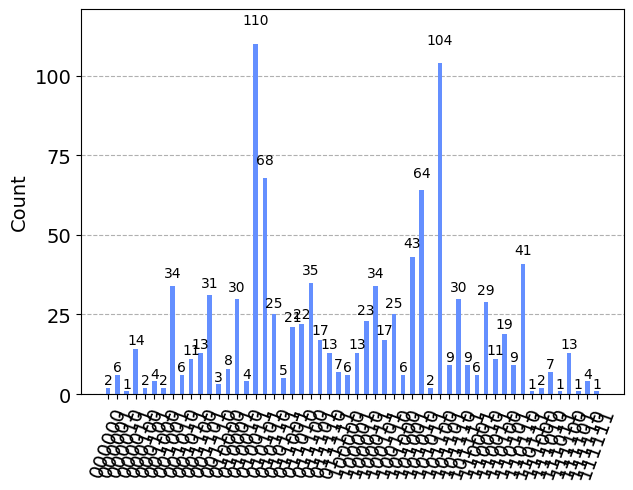

In [27]:
from qiskit.visualization import plot_histogram

backend = Aer.get_backend('aer_simulator')
backend.shots = 512

qc_res = create_qaoa_circ(G, res.x)
# print(qc_res)
counts = backend.run(qc_res, seed_simulator=10).result().get_counts()
# for i, j in keys(counts),values(counts):
#   if(j>60):
#     print(i,j)
print(backend.run(qc_res, seed_simulator=10).result().get_counts())
plot_histogram(counts)

**PENNYLANE**

In [28]:
!pip install pennylane

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
import pennylane as qml
from pennylane import numpy as np

np.random.seed(42)


In [30]:
n_wires = 4
graph = [(0, 1), (0, 3), (1, 2), (2, 3)]

# unitary operator U_B with parameter beta
def U_B(beta):
    for wire in range(n_wires):
        qml.RX(2 * beta, wires=wire)


# unitary operator U_C with parameter gamma
def U_C(gamma):
    for edge in graph:
        wire1 = edge[0]
        wire2 = edge[1]
        qml.CNOT(wires=[wire1, wire2])
        qml.RZ(gamma, wires=wire2)
        qml.CNOT(wires=[wire1, wire2])

In [31]:
def bitstring_to_int(bit_string_sample):
    bit_string = "".join(str(bs) for bs in bit_string_sample)
    return int(bit_string, base=2)


In [32]:
dev = qml.device("default.qubit", wires=n_wires, shots=1)

In [33]:
@qml.qnode(dev)
def circuit(gammas, betas, edge=None, n_layers=1):
    # apply Hadamards to get the n qubit |+> state
    for wire in range(n_wires):
        qml.Hadamard(wires=wire)
    # p instances of unitary operators
    for i in range(n_layers):
        U_C(gammas[i])
        U_B(betas[i])
    if edge is None:
        # measurement phase
        return qml.sample()
    # during the optimization phase we are evaluating a term
    # in the objective using expval
    H = qml.PauliZ(edge[0]) @ qml.PauliZ(edge[1])
    return qml.expval(H)


In [17]:
def qaoa_maxcut(n_layers=1):
    print("\np={:d}".format(n_layers))

    # initialize the parameters near zero
    init_params = 0.01 * np.random.rand(2, n_layers, requires_grad=True)

    # minimize the negative of the objective function
    def objective(params):
        gammas = params[0]
        betas = params[1]
        neg_obj = 0
        for edge in graph:
            # objective for the MaxCut problem
            neg_obj -= 0.5 * (1 - circuit(gammas, betas, edge=edge, n_layers=n_layers))
        return neg_obj

    # initialize optimizer: Adagrad works well empirically
    opt = qml.AdagradOptimizer(stepsize=0.5)

    # optimize parameters in objective
    params = init_params
    steps = 30
    for i in range(steps):
        params = opt.step(objective, params)
        if (i + 1) % 5 == 0:
            print("Objective after step {:5d}: {: .7f}".format(i + 1, -objective(params)))

    # sample measured bitstrings 100 times
    bit_strings = []
    n_samples = 100
    for i in range(0, n_samples):
        bit_strings.append(bitstring_to_int(circuit(params[0], params[1], edge=None, n_layers=n_layers)))

    # print optimal parameters and most frequently sampled bitstring
    counts = np.bincount(np.array(bit_strings))
    most_freq_bit_string = np.argmax(counts)
    print("Optimized (gamma, beta) vectors:\n{}".format(params[:, :n_layers]))
    print("Most frequently sampled bit string is: {:04b}".format(most_freq_bit_string))

    return -objective(params), bit_strings


# perform qaoa on our graph with p=1,2 and
# keep the bitstring sample lists
bitstrings1 = qaoa_maxcut(n_layers=1)[1]
bitstrings2 = qaoa_maxcut(n_layers=2)[1]


p=1
Objective after step     5:  4.0000000
Objective after step    10:  3.0000000
Objective after step    15:  4.0000000
Objective after step    20:  3.0000000
Objective after step    25:  3.0000000
Objective after step    30:  3.0000000
Optimized (gamma, beta) vectors:
[[-0.63789432]
 [ 0.42900392]]
Most frequently sampled bit string is: 1010

p=2
Objective after step     5:  2.0000000
Objective after step    10:  4.0000000
Objective after step    15:  3.0000000
Objective after step    20:  4.0000000
Objective after step    25:  4.0000000
Objective after step    30:  4.0000000
Optimized (gamma, beta) vectors:
[[-1.63774005  0.95207792]
 [-0.36133511 -0.85343068]]
Most frequently sampled bit string is: 0101
